In [7]:
import os
import librosa
import numpy as np
import soundfile as sf
from audiomentations import Compose, AddBackgroundNoise, AddColorNoise, AirAbsorption, AddGaussianSNR
import IPython.display as ipd
import matplotlib.pyplot as plt

# Define the paths to your audio directories
positive_audio_dir = "/home/gridsan/abradshaw/MITBuzz/Positive_1sec_20240607"
negative_audio_dir = "/home/gridsan/abradshaw/MITBuzz/Negative_1sec_20240607"
augmented_positive_dir = "/home/gridsan/abradshaw/MITBuzz/Augmented_Positive_1sec_20240607"
augmented_negative_dir = "/home/gridsan/abradshaw/MITBuzz/Augmented_Negative_1sec_20240607"

# Define the paths for background noise and short noise files
add_background_noise_path = "/home/gridsan/abradshaw/MITBuzz/Background_noise"

# Define the transformations
transform = Compose([
    AddBackgroundNoise(sounds_path=add_background_noise_path, min_snr_db=3.0, max_snr_db=30.0, p=1.0),
    AddColorNoise(min_snr_db=5.0, max_snr_db=40.0, min_f_decay=-6.0, max_f_decay=6.0, p=0.75),
    AirAbsorption(min_distance=10.0, max_distance=50.0, p=1.0),
    AddGaussianSNR(min_snr_db=5.0, max_snr_db=40.0, p=1.0)
])

def load_and_transform_audio(file_path):
    # Load audio file with stereo and 48kHz sampling rate
    audio, sr = librosa.load(file_path, sr=44100, mono=True)
    # Apply transformations
    augmented_audio = transform(samples=audio, sample_rate=sr)
    return audio, augmented_audio, sr


def process_directory(input_dir, output_dir):
    for file_name in os.listdir(input_dir):
        file_path = os.path.join(input_dir, file_name)
        audio, augmented_audio, sr = load_and_transform_audio(file_path)
        # Save augmented files
        sf.write(os.path.join(output_dir, file_name), augmented_audio, sr)

def visualize_and_listen(original_audio, augmented_audio, sr, file_name):
    fig, ax = plt.subplots(2, 1, figsize=(12, 6))
    
    ax[0].plot(original_audio)
    ax[0].set_title(f'Original Audio: {file_name}')
    
    ax[1].plot(augmented_audio)
    ax[1].set_title(f'Augmented Audio: {file_name}')
    
    plt.show()
    
    print("Original Audio:")
    ipd.display(ipd.Audio(original_audio, rate=sr))
    print("Augmented Audio:")
    ipd.display(ipd.Audio(augmented_audio, rate=sr))
    


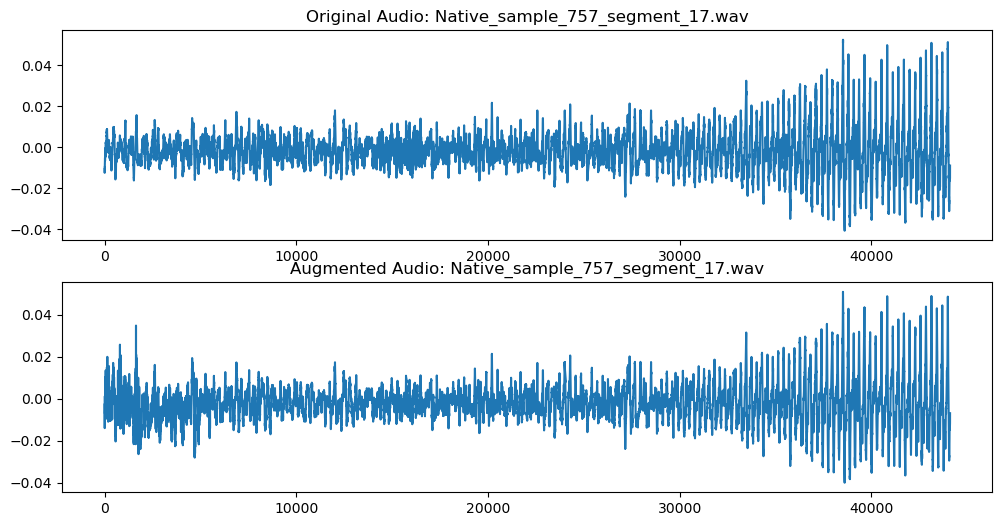

Original Audio:


Augmented Audio:


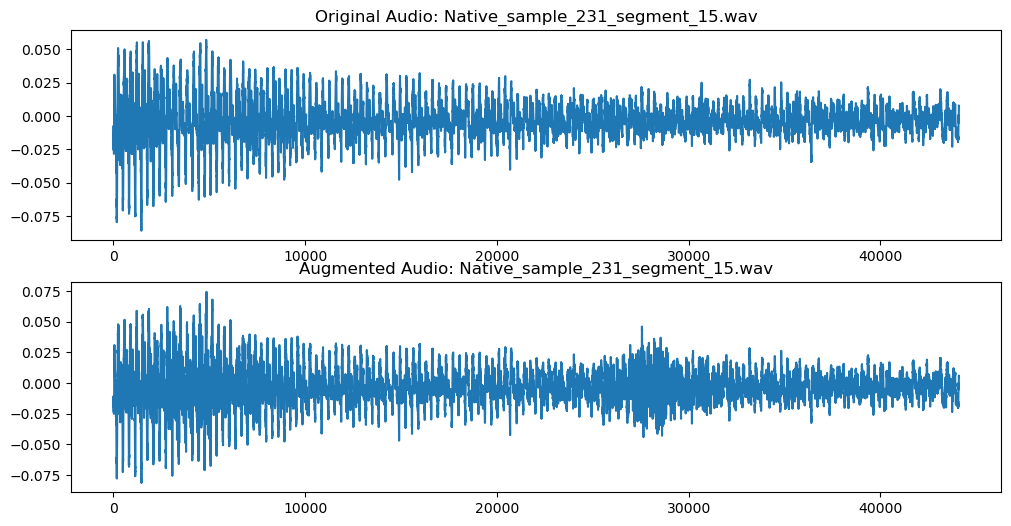

Original Audio:


Augmented Audio:


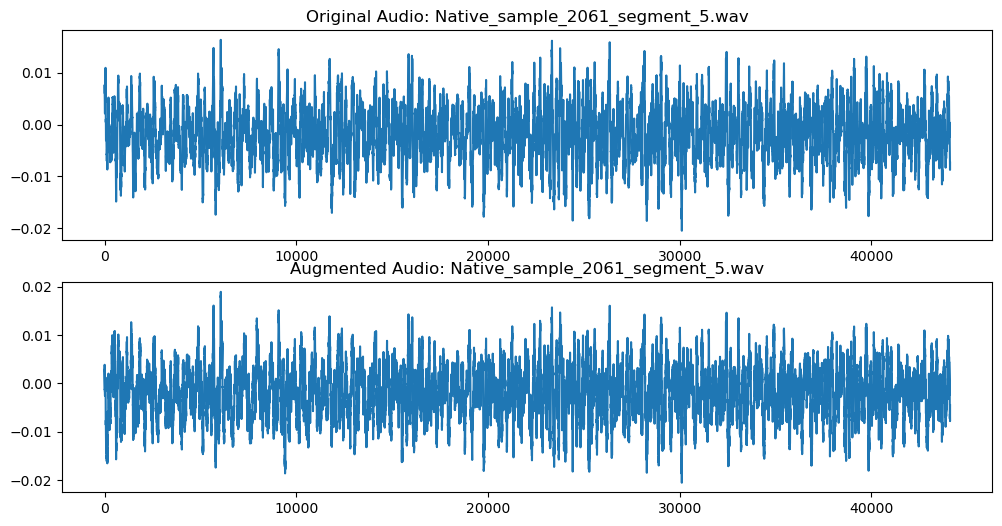

Original Audio:


Augmented Audio:


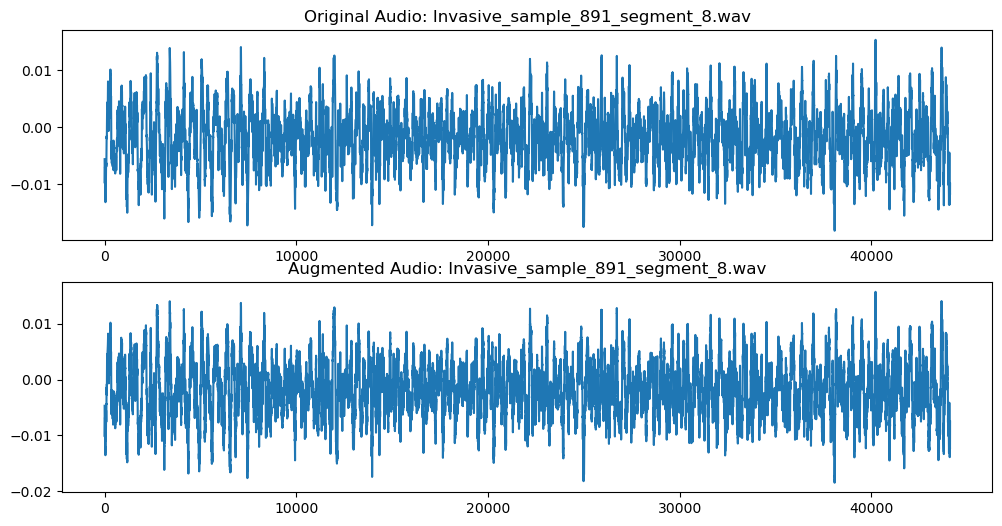

Original Audio:


Augmented Audio:


/home/gridsan/abradshaw/.conda/envs/python39++/lib/python3.9/site-packages/audiomentations/augmentations/add_background_noise.py:205: UserWarning: The file /home/gridsan/abradshaw/MITBuzz/Background_noise/5-207781-A-17.wav is too silent to be added as noise. Returning the input unchanged.
  warnings.warn(


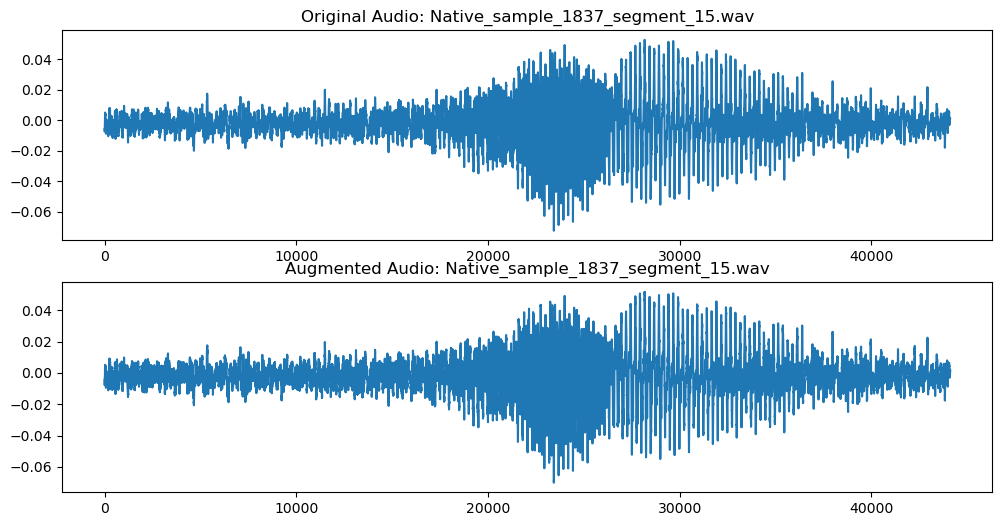

Original Audio:


Augmented Audio:


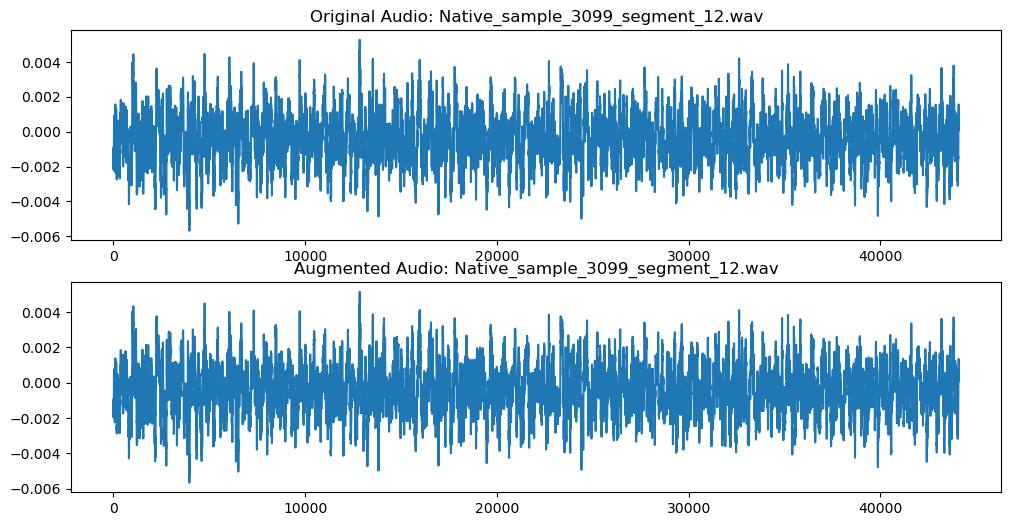

Original Audio:


Augmented Audio:


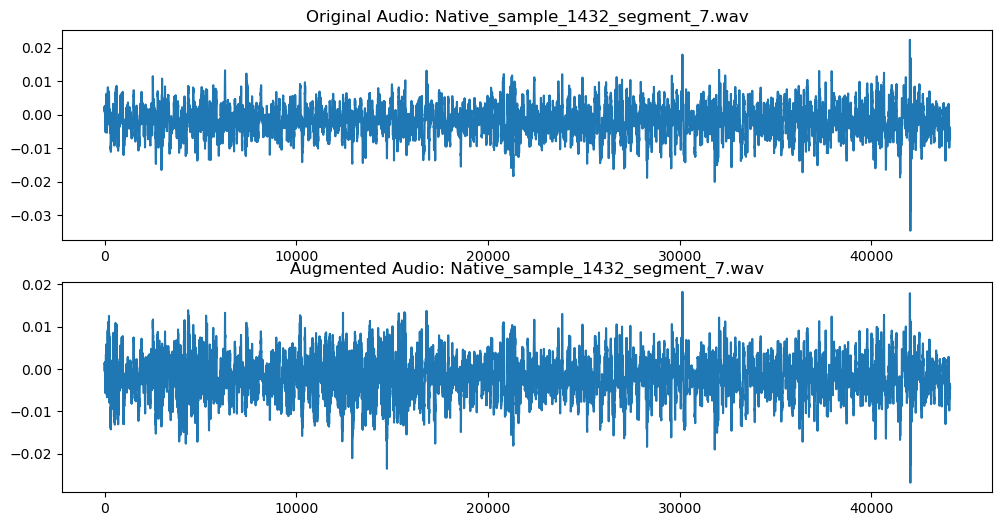

Original Audio:


Augmented Audio:


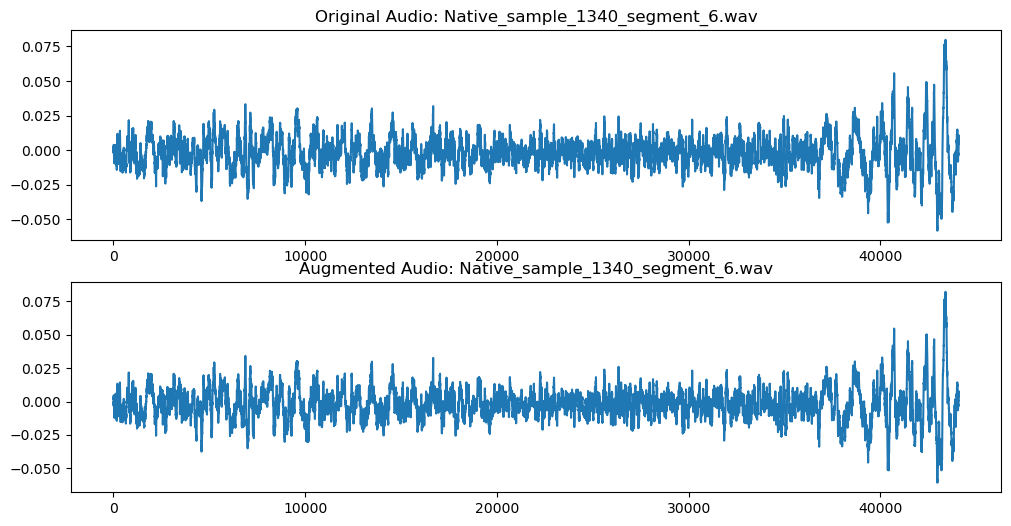

Original Audio:


Augmented Audio:


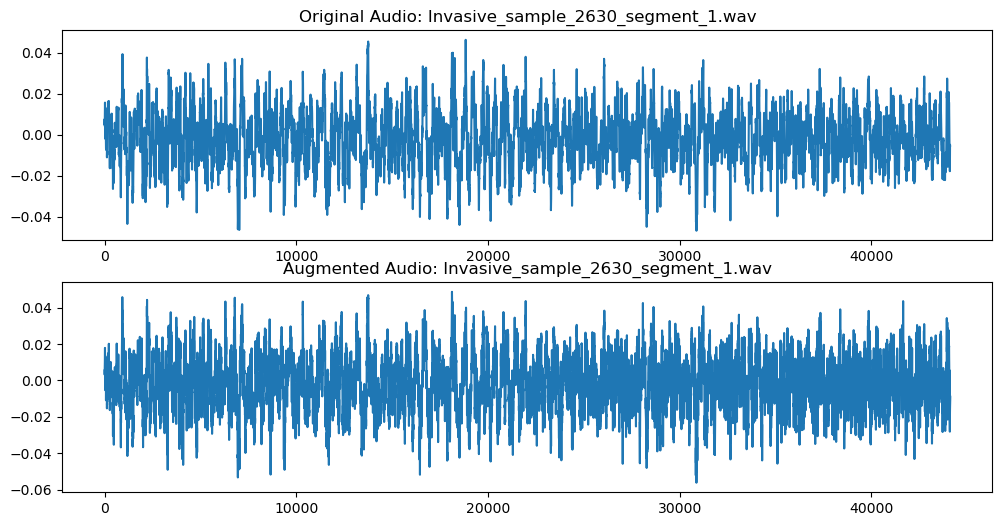

Original Audio:


Augmented Audio:


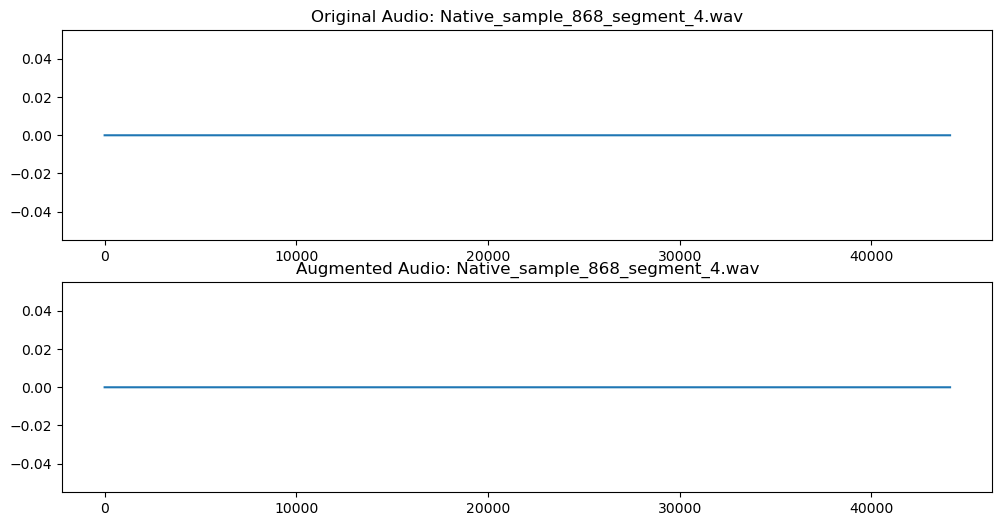

Original Audio:


/home/gridsan/abradshaw/.local/lib/python3.9/site-packages/IPython/lib/display.py:187: RuntimeWarning: invalid value encountered in divide
  scaled = data / normalization_factor * 32767


Augmented Audio:


In [8]:
# Load and visualize a few examples
positive_examples = os.listdir(positive_audio_dir)[:5]
negative_examples = os.listdir(negative_audio_dir)[:5]

for file_name in positive_examples:
    file_path = os.path.join(positive_audio_dir, file_name)
    original_audio, augmented_audio, sr = load_and_transform_audio(file_path)
    visualize_and_listen(original_audio, augmented_audio, sr, file_name)
    # Save augmented files for inspection
    sf.write(os.path.join(augmented_positive_dir, file_name), augmented_audio, sr)

for file_name in negative_examples:
    file_path = os.path.join(negative_audio_dir, file_name)
    original_audio, augmented_audio, sr = load_and_transform_audio(file_path)
    visualize_and_listen(original_audio, augmented_audio, sr, file_name)
    # Save augmented files for inspection
    sf.write(os.path.join(augmented_negative_dir, file_name), augmented_audio, sr)